# Parts:
### A. Exploratory Analysis
### B. Machine Learning
### C. Optimization
### D. Prediction

# Part A: Exploratory Analysis

### 1. Importing the libraries required for dataset manipulation

In [36]:
import numpy as np
import pandas as pd

### 2. Reading in the data

In [2]:
orig_data = pd.read_csv('train_values.csv')
labels_data = pd.read_csv('train_labels.csv')

### 3. Merging `orig_data` and  `labels_data` into the dataFrame called `dataset` 

In [3]:
dataset = pd.merge(orig_data,labels_data, on="building_id")
dataset.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


 ### 4. Checking the` dtypes` of the respective variables.

In [4]:
dataset.dtypes

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

## Comment:
We note that there are variables whose dtypes are 'object'. 
Decision Trees are not compatible with 'object' dtypes. 

Hence, they must be converted to numeric values.

The team employed `OneHotEncoder` with the help of` LabelEncoder`. It creates a column for each categorical values, and the values under each column will become binary. 

### 5. Implementing OneHotEncoder
The team implemented `OneHotEncoder` on `target_var`

#### 5.1 Storing the variables with `'object'` `dtypes` into `target_var`.
This is for easy access of these variables.

In [5]:
target_var=[]
for var in dataset:
    if dataset[var].dtypes == np.dtype('object'):
        target_var.append(var)
target_var

['land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'legal_ownership_status']

#### 5.2 OneHotEncoder Implementation

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
for z in target_var:
    column_name = dataset[z].astype('category').cat.categories
    x = dataset[z]
    y = LabelEncoder()
    y = y.fit_transform(x)
    data = OneHotEncoder(sparse=False)
    y_encoder = y.reshape(len(y), 1)
    y_encoded = data.fit_transform(y_encoder)
    y_encoded= y_encoded.astype('int32')
    dataset = pd.concat([dataset, pd.DataFrame(y_encoded, columns = z + '(' + column_name + ')', index = dataset.index)], axis = 1)
dataset.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,plan_configuration(m),plan_configuration(n),plan_configuration(o),plan_configuration(q),plan_configuration(s),plan_configuration(u),legal_ownership_status(a),legal_ownership_status(r),legal_ownership_status(v),legal_ownership_status(w)
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,1,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,1,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,1,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,1,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,1,0


Now that the dataset is ready we can perform further analysis on the dataset. 
________________________

### 6. `countplot` of `'damage_grade'`

In [7]:
import seaborn as sb
sb.set()
# Count Plot for Damage Grade
sb.countplot(dataset["damage_grade"])

### Comment:
There is an imbalance in the dataset. Implementing Decision Tree Classifier or Random Forest Classifier on such a dataset will result in a great bias towards the majority dataset. In this case, there will be a great bias towards classifying a sample as`damage_grade = 2`. 

### 7. Splitting the dataset  using `train_test_split`

#### 7.1 Storing indepenedent variables in `variables`

In [8]:
variables = []
for vars in dataset:
    if dataset[vars].dtypes != np.dtype('object'):
        if vars != 'damage_grade' and vars != 'building_id':
                variables.append(vars)

#### 7.2 `train_test_split` implementation

In [9]:
# importing necessary libraries 
from sklearn.model_selection import train_test_split 

y = pd.DataFrame(dataset["damage_grade"])
X = pd.DataFrame(dataset[variables]) 

# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 50, test_size = 0.3, stratify = y) 

#### 7.3 Checking the countplots

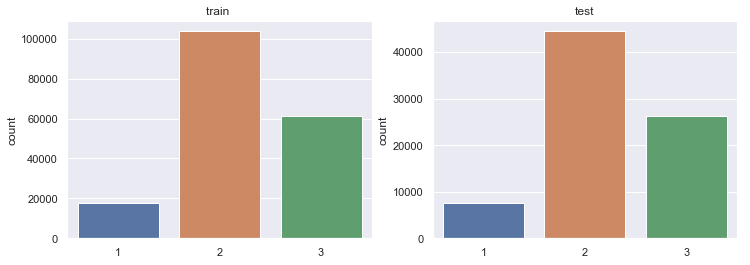

In [14]:
import matplotlib.pyplot as plt
f, (axes1, axes2) = plt.subplots(1, 2, figsize=(12, 4))
# Count Plot for Damage Grade
axes1.set_title("train ")
axes2.set_title("test")
sb.countplot(x = np.ravel(y_train), ax=axes1)
sb.countplot(x = np.ravel(y_test), ax=axes2)

### 8. Cramér's V
Source: https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
Cramér's V (sometimes referred to as Cramér's phi and denoted as φc) is a measure of association between two nominal variables.

The definition of correlation is related to `Pearson's r`. Finding the correlation between the variables and the `'damage_grade'` is not applicable for this problem as most of the features or variables are categorical.

The more appropriate term is finding the measure of association between two categorical variables which is Cramér's V.

#### 8.1 Creating a function `cramers_v`

In [15]:
import scipy.stats as ss
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
#Source: https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792

#### 8.2 Passing the parameters into the function call

In [16]:
cramers_v_list =  []
for x in variables:
    confusion_matrix = pd.crosstab(X_train[x], y_train["damage_grade"]).as_matrix()
    cramers_v_list.append(cramers_v(confusion_matrix))

C:\Users\Joe\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


#### 8.3 Printing out the results

In [17]:
columns_val = ["Cramers V Value"]
cramers_v_list = pd.DataFrame(data = cramers_v_list, index= variables, columns = columns_val)
cramers_v_list

,Cramers V Value
geo_level_1_id,0.371844
geo_level_2_id,0.500961
geo_level_3_id,0.548204
count_floors_pre_eq,0.155535
age,0.184770
area_percentage,0.123298
height_percentage,0.150364
has_superstructure_adobe_mud,0.075512
has_superstructure_mud_mortar_stone,0.334101
has_superstructure_stone_flag,0.065913


### 9. Sampling Manipulation

#### Note: Open Anaconda command line and install the following:
`pip install tensorflow`

`pip install -U imbalanced-learn`

Sources:

1. https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.combine.SMOTETomek.html

#### 9.1 Resampling with SMOTETomek

Oversampling methods such as SMOTE generate noisy samples by interpolating new points between marginal outliers and inliers. This issue can be solved by cleaning the space resulting from oversampling.

Tomek’s link and edited nearest-neighbours are the two cleaning methods that have been added to the pipeline after applying SMOTE over-sampling to obtain a cleaner space. 

In [18]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
stomek = SMOTETomek (tomek=TomekLinks(sampling_strategy='majority'), random_state=0)
x_stomek, y_stomek = stomek.fit_resample(X_train, y_train)

Using TensorFlow backend.
C:\Users\Joe\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Joe\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Joe\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Joe\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: Fu

#### 9.2 Comparing countplots of SMOTETomek Train dataset with the Normal Train Dataset. 

Normal Train Dataset:  (182420, 68) (182420, 1)
SMOTETomek Train Dataset:  (309059, 68) (309059, 1)


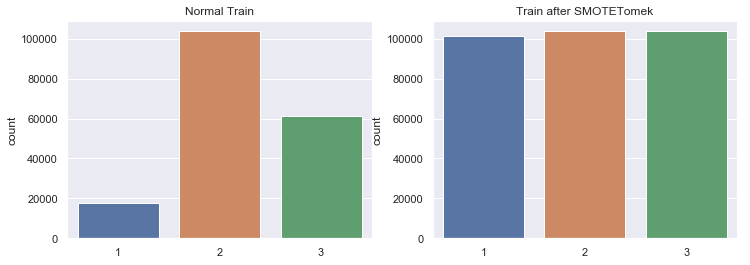

In [19]:
f, (axes3, axes4) = plt.subplots(1, 2, figsize=(12, 4))
# Count Plot for Damage Grade
axes3.set_title("Normal Train")
axes4.set_title("Train after SMOTETomek")
sb.countplot(x = np.ravel(y_train), ax=axes3)
sb.countplot(x = np.ravel(y_stomek), ax=axes4)

print("Normal Train Dataset: ", X_train.shape, y_train.shape)
print("SMOTETomek Train Dataset: ", x_stomek.shape, y_stomek.shape)

### Comment: 
With reference to the figures above, we can observe that `damage_grade = 1` and `damage_grade=3` were oversampled.
There was also some undersampling done on the data as observed when only SMOTE was implemented on another notebook. 

In [20]:
X_train = pd.DataFrame(x_stomek)
y_train = pd.DataFrame(y_stomek)

### 10 Comparing Cramers V Values

In [17]:
cramers_v_list1 =  []
for x in variables:
    confusion_matrix1 = pd.crosstab(X_train[x], y_train["damage_grade"]).as_matrix()
    
    cramers_v_list1.append(cramers_v(confusion_matrix1))


C:\Users\Joe\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
columns_val1 = ["Cramers V Value with SMOTETomek"]
cramers_v_list1 = pd.DataFrame(data = cramers_v_list1, index= variables, columns = columns_val1)
cramers_v_list1.head()

,Cramers V Value with SMOTETomek
geo_level_1_id,0.430962
geo_level_2_id,0.565492
geo_level_3_id,0.628083
count_floors_pre_eq,0.260345
age,0.391433
area_percentage,0.156974
height_percentage,0.218284
has_superstructure_adobe_mud,0.149786
has_superstructure_mud_mortar_stone,0.542895
has_superstructure_stone_flag,0.105451


In [19]:
correlations_comparison = pd.merge(cramers_v_list1, cramers_v_list, on=X_train.columns)
correlations_comparison

,key_0,Cramers V Value with SMOTETomek,Cramers V Value
0,geo_level_1_id,0.430962,0.371844
1,geo_level_2_id,0.565492,0.500961
2,geo_level_3_id,0.628083,0.548204
3,count_floors_pre_eq,0.260345,0.155535
4,age,0.391433,0.184770
5,area_percentage,0.156974,0.123298
6,height_percentage,0.218284,0.150364
7,has_superstructure_adobe_mud,0.149786,0.075512
8,has_superstructure_mud_mortar_stone,0.542895,0.334101
9,has_superstructure_stone_flag,0.105451,0.065913


### Comment:
There was an overall improvement in the Cramer's V values. 
Hence, the sampling method done was effective. 

# Part B: Machine Learning

# Single Decision Tree

### 1. Resetting the values of variables

In [14]:
X_train = x_stomek
y_train = y_stomek

### 2. Implementing DecisionTreeClassifier

In [15]:
from sklearn.tree import DecisionTreeClassifier

# Make a decision tree and train
tree = DecisionTreeClassifier(max_depth = 5, random_state=50)

# train the decision tree model
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=50, splitter='best')

### 3. Visualizaing th Decision Tree

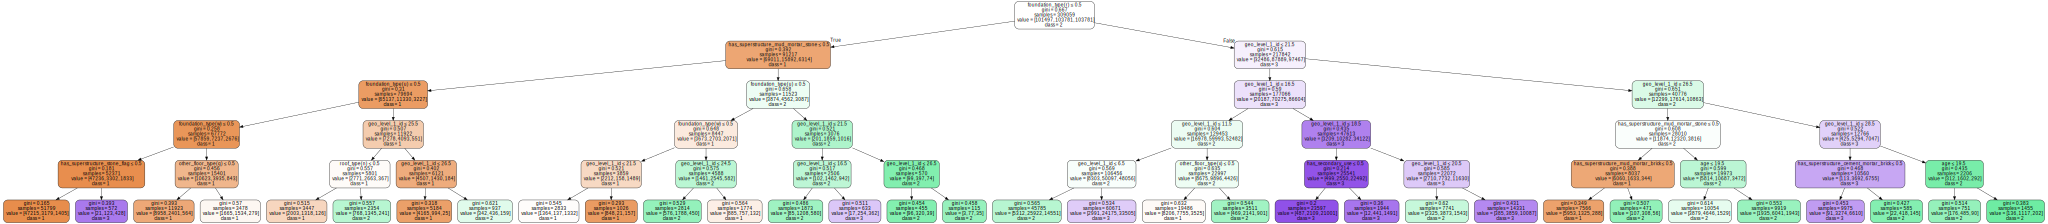

In [23]:
# Import DecisionTreeClassifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier                 

# Plot the Decision Tree
from sklearn.tree import export_graphviz
treedot = export_graphviz(tree,                                      # the model
                          feature_names = X.columns,              # the features 
                          class_names = ['1', '2', '3'],
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript
import graphviz
graphviz.Source(treedot)

### 4. Retrieving the Classification Report

In [26]:
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.metrics import confusion_matrix

# Predict Legendary values corresponding to Total
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(y_test, y_test_pred, digits=3))

              precision    recall  f1-score   support

           1      0.345     0.681     0.458      7537
           2      0.725     0.484     0.581     44478
           3      0.557     0.714     0.626     26166

    accuracy                          0.580     78181
   macro avg      0.542     0.627     0.555     78181
weighted avg      0.632     0.580     0.584     78181



### 5. Visualizing the Confusion Matrix

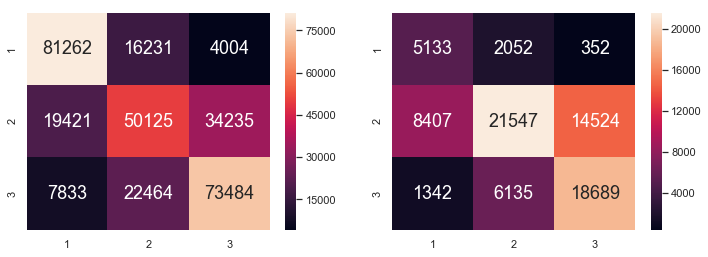

In [27]:
xy_labels = dataset['damage_grade'].astype('category').cat.categories
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18},xticklabels = xy_labels, yticklabels = xy_labels, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},xticklabels = xy_labels, yticklabels = xy_labels, ax = axes[1])

# Random Forest 

Now we can move on to a more powerful model, the random forest. This takes the idea of a single decision tree, and creates an ensemble model out of hundreds or thousands of trees to reduce the variance. Each tree is trained on a random set of the observations, and for each split of a node, only a subset of the features are used for making a split. When making predictions, the random forest averages the predictions for each of the individual decision trees for each data point in order to arrive at a final classification.

Creating and training a random forest in extremely easy in Scikit-Learn. The cell below is all you need.

https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76


### 1. Creating the model

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100,
                               criterion = 'gini',
                               bootstrap = True,
                               max_depth = 5,
                               max_features = None,
                               n_jobs=-1)

# Fit on training data
model.fit(X_train, np.ravel(y_train))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=None,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

We can see how many nodes there are for each tree on average and the maximum depth of each tree. There were 100 trees in the forest.

https://www.codementor.io/@agarrahul01/multiclass-classification-using-random-forest-on-scikit-learn-library-hkk4lwawu

### 2. Predicting the Test set results

In [29]:
# Predicting the Test set results
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

### 3. Heatmap

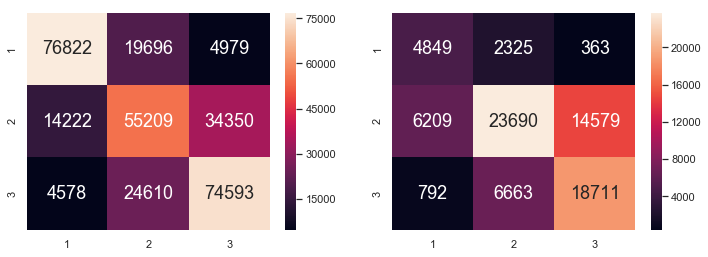

In [30]:
xy_labels = dataset['damage_grade'].astype('category').cat.categories
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18},xticklabels = xy_labels, yticklabels = xy_labels, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},xticklabels = xy_labels, yticklabels = xy_labels, ax = axes[1])

### 4. Getting the classification report
Standard Library: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics



In [31]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_test_pred, digits=3))

              precision    recall  f1-score   support

           1      0.409     0.643     0.500      7537
           2      0.725     0.533     0.614     44478
           3      0.556     0.715     0.626     26166

    accuracy                          0.604     78181
   macro avg      0.563     0.630     0.580     78181
weighted avg      0.638     0.604     0.607     78181



# Part C: Optimization


# Hyperparameter Tuning
Source: https://towardsdatascience.com/optimizing-hyperparameters-in-random-forest-classification-ec7741f9d3f6

1. Checking the current parameters in used.

In [32]:
from pprint import pprint# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


### 2. Creating a Parameter Grid
We create a parameter grid to sample from during fitting.

In [33]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 50)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt',None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(50, 70, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, None],
 'max_features': ['auto', 'sqrt', None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50,
                  69,
                  88,
                  108,
                  127,
                  146,
                  166,
                  185,
                  205,
                  224,
                  243,
                  263,
                  282,
                  302,
                  321,
                  340,
                  360,
                  379,
                  398,
                  418,
                  437,
                  457,
                  476,
                  495,
                  515,
                  534,
                  554,
                  573,
                  592,
                  612,
                  631,
                  651,
                  670,
                  689,
                  7

### Comment:
On each iteration, the algorithm will choose a difference combination of the features. Altogether, there are 2(bootstrap) * 12 (max_depth) * 3(max_features) * 3 (min_samples_split) * 3(min_samples_lead)  * 50(n_estimators) = 4320 settings! However, the benefit of a random search is that we are not trying every combination, but selecting at random to sample a wide range of values.

### 3. Instantiate the random search

In [36]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 2, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_test,np.ravel(y_test))

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:   52.7s remaining:   52.7s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed: 24.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

### 4. Fitting

In [37]:
rf_random.best_params_

{'n_estimators': 922,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': None,
 'max_depth': None,
 'bootstrap': True}

# Part D: Predicting the `test_values.csv`

In [22]:
from sklearn.ensemble import RandomForestClassifier
# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=922,
                               min_samples_split = 2,
                               criterion = 'gini',
                               min_samples_leaf = 1,
                               bootstrap = True,
                               max_depth = None,
                               max_features = None,
                               n_jobs=-1)

# Fit on training data
model.fit(X_train, np.ravel(y_train))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=922,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [23]:
# Predicting the Test set results
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

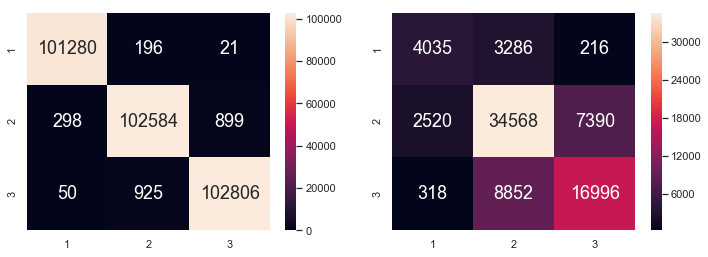

In [43]:
xy_labels = dataset['damage_grade'].astype('category').cat.categories
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18},xticklabels = xy_labels, yticklabels = xy_labels, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},xticklabels = xy_labels, yticklabels = xy_labels, ax = axes[1])

In [44]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_test_pred, digits=3))

              precision    recall  f1-score   support

           1      0.587     0.535     0.560      7537
           2      0.740     0.777     0.758     44478
           3      0.691     0.650     0.670     26166

    accuracy                          0.711     78181
   macro avg      0.673     0.654     0.663     78181
weighted avg      0.709     0.711     0.709     78181



In [37]:
feature_list = X_train.columns
# Get numerical feature importances
importances = list(model.feature_importances_)# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [44]:
feature_importances = pd.DataFrame(feature_importances)
feature_importances


,0,1
0,foundation_type(r),0.18
1,geo_level_1_id,0.14
2,geo_level_2_id,0.11
3,geo_level_3_id,0.11
4,age,0.09
5,area_percentage,0.07
6,height_percentage,0.04
7,has_superstructure_mud_mortar_stone,0.03
8,count_families,0.02
9,count_floors_pre_eq,0.01


In [45]:
data_to_predict = pd.read_csv('test_values.csv')

In [46]:
data_to_predict

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,...,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,...,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,...,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,...,0,0,0,0,0,0,0,0,0,0
5,871976,22,170,4029,1,55,4,3,t,r,...,0,0,0,0,0,0,0,0,0,0
6,691228,26,432,6794,2,0,6,7,n,r,...,0,0,0,0,0,0,0,0,0,0
7,896100,8,1373,958,2,35,2,8,t,r,...,0,0,0,0,0,0,0,0,0,0
8,343471,16,244,3521,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
9,766647,26,761,3137,2,5,6,7,n,r,...,0,0,0,0,0,0,0,0,0,0


In [49]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
for s in target_var:
    column_name = data_to_predict[s].astype('category').cat.categories
    t = data_to_predict[s]
    u = LabelEncoder()
    u = u.fit_transform(t)
    data = OneHotEncoder(sparse=False)
    u_encoder = u.reshape(len(u), 1)
    u_encoded = data.fit_transform(u_encoder)
    u_encoded= u_encoded.astype('int32')
    data_to_predict = pd.concat([data_to_predict, pd.DataFrame(u_encoded, columns = s + '(' + column_name + ')', index = data_to_predict.index)], axis = 1)
data_to_predict.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,plan_configuration(m),plan_configuration(n),plan_configuration(o),plan_configuration(q),plan_configuration(s),plan_configuration(u),legal_ownership_status(a),legal_ownership_status(r),legal_ownership_status(v),legal_ownership_status(w)
0,300051,17,596,11307,3,20,7,6,t,r,...,0,0,0,0,0,0,0,0,1,0
1,99355,6,141,11987,2,25,13,5,t,r,...,0,0,0,0,0,0,0,0,1,0
2,890251,22,19,10044,2,5,4,5,t,r,...,0,0,0,0,0,0,0,0,1,0
3,745817,26,39,633,1,0,19,3,t,r,...,0,0,0,0,0,0,0,0,1,0
4,421793,17,289,7970,3,15,8,7,t,r,...,0,0,0,0,0,0,0,0,1,0


In [50]:
damage_grade_predictions = model.predict(data_to_predict[variables])

In [82]:
data_to_predict["damage_grade"]=damage_grade_predictions

In [88]:
orig_columns = np.ravel(orig_data.columns)
orig_columns = np.append(orig_columns, 'damage_grade')

In [92]:

data_to_predict[orig_columns].to_excel("output.xlsx")

End of Code

_________